# Telco Classification Project

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.set_option('display.max_colwidth', 200)
import seaborn as sns
from scipy import stats
import acquire as a
import prepare as p
import explore as e
import model as m
import os
import env
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic not linear!
from sklearn.neighbors import KNeighborsClassifier #pick the classifier one
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Acquire

* Data acquired from the Codeup MySQL database `telco_churn`
* Size is 7,043 rows and 24 columns before preparing.
* Each row represents a customer at Telco
* Each column represents a feature of the customers.

In [2]:
df = a.get_telco_data()

this file exists, reading csv


## Prepare

* Drop duplicate columns that are unnecesary
    * `payment_type_id`
    * `internet_service_type_id`
    * `contract_type_id`
* Replaced empty space values with 0.0 to assign it a value
* Filled null values with 'No internet service' because that's what it was originally supposed to represent, they weren't really null.

In [4]:
df = p.prep_telco(df)

In [5]:
# Splitting the DataFrame 'df' into training, validation, and test sets using the 'churn' column for stratification
# The resulting subsets are assigned to variables 'train', 'validate', and 'test'

train, validate, test = p.splitting_data(df, 'churn')

In [6]:
print(train.shape)
print(validate.shape)
test.shape

(4225, 21)
(1409, 21)


(1409, 21)

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* How often are customers churning
* Is churn independent of tech support?
* Is churn independent of internet service type?
* Is churn independent of phone service?
* Are there variations in churn based on monthly charges?
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

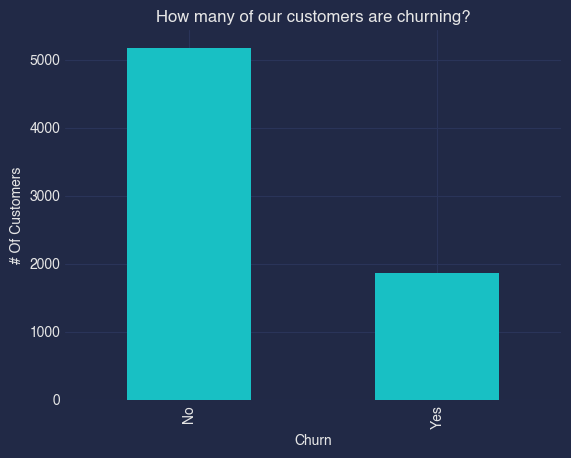

27.0


In [7]:
df.churn.value_counts().plot.bar()
plt.title('How many of our customers are churning?')
plt.xlabel('Churn')
plt.ylabel('# Of Customers')
plt.show()
print(round((df.churn == 'Yes').sum() / len(df),2)*100)

## You may use this as a template for how to ask and answer each question:

### **Statistical Hypothesis Testing**

tech_support & churn

Chi2: 482.09154879788
P-value: 6.05233167722674e-101
Degrees of Freedom: 6


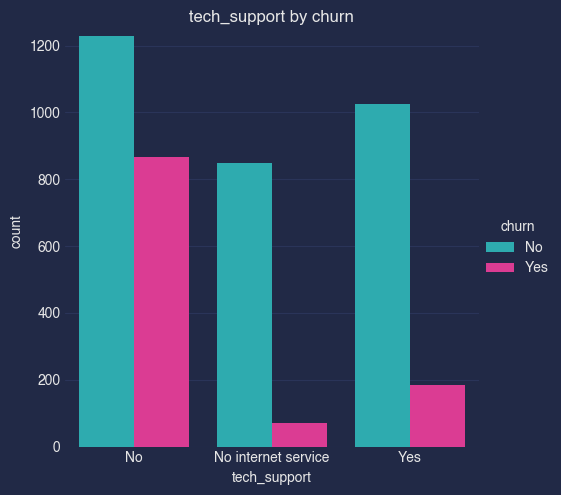

In [8]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'tech_support')

### **1. <i>Is `churn` independent of `tech_support`?</i>**
<i> discrete (`churn`) vs Discrete (`tech_support`) = $Chi^2$ </i>

* $H_0$: `churn` is independent from `tech_support`

* $H_a$: `churn` is **NOT** independent from `tech_support`

* α = 0.05

    - $Chi^2$ = 482.09154879788
    - $p$ = 6.05233167722674e-101
    - $p$  <  α

### <b> <u> We reject the null hypothesis. </u> </b>

internet_service_type & churn

Chi2: 417.88813854093104
P-value: 3.9804371258943206e-87
Degrees of Freedom: 6


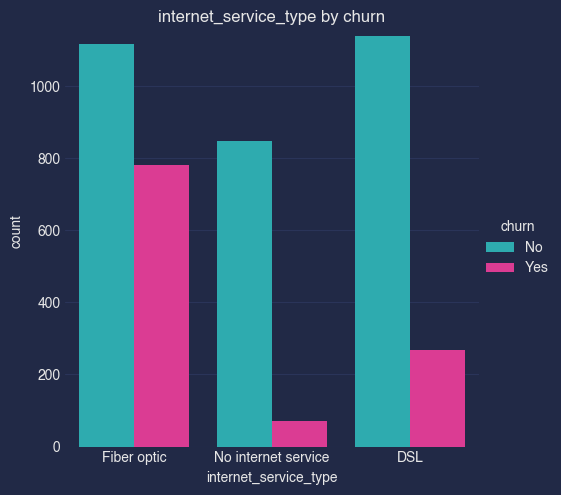

In [9]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'internet_service_type')

### **2. <i>Is there a difference in `churn` based on `internet_service_type`?</i>**
<i> Discrete (`churn`) vs Discrete (`internet_service_type`) = $Chi^2$ </i>

* $H_0$: `churn` is independent from `internet_service_type`

* $H_a$: `churn` is **NOT** independent from `internet_service_type`

* α = 0.05

    - $Chi^2$ = 417.88813854093104
    - $p$ = 3.9804371258943206e-87
    - $p$  <  α

### <b> <u> We reject the null hypothesis. </u> </b>

phone_service & churn

Chi2: 0.4404388389725981
P-value: 0.9790341790305054
Degrees of Freedom: 4


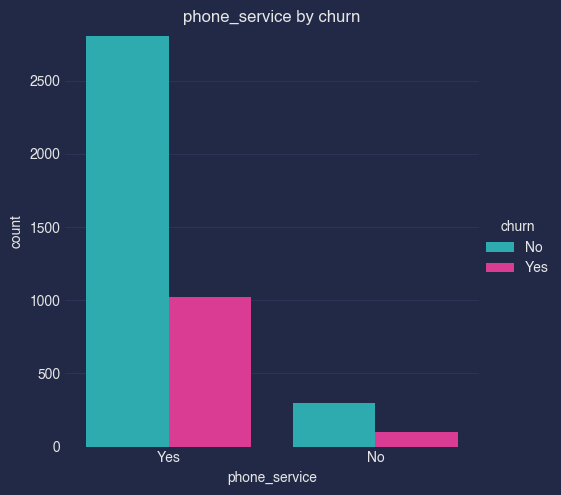

In [10]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'phone_service')

### **3. <i>Is `churn` independent of `phone_service`?</i>**
<i> discrete (`churn`) vs Discrete (`phone_service`) = $Chi^2$ </i>

* $H_0$: `churn` is independent from `phone_service`

* $H_a$: `churn` is **NOT** independent from `phone_service`

* α = 0.05

    - $Chi^2$ = 0.4404388389725981
    - $p$ = 0.9790341790305054
    - $p$  >  α

### <b> <u> We fail to reject the null hypothesis. </u> </b>

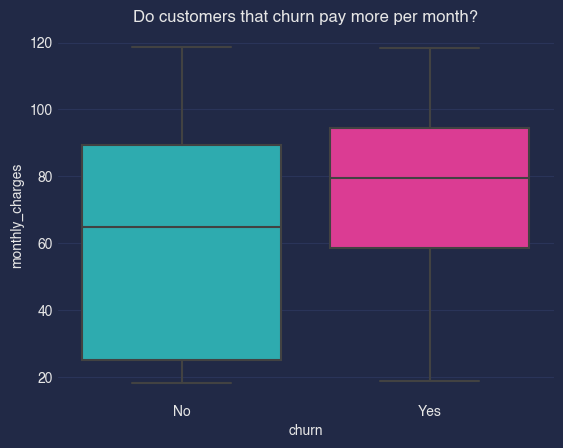

In [11]:
#Monthly charges and churn
sns.boxplot(data=train, y='monthly_charges', x='churn')
plt.title('Do customers that churn pay more per month?')
plt.show()

It definitely seems like the median monthly charge is higher for customers that have churned compared to those that haven't.

In [12]:
churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

t, p_val = stats.ttest_ind(churn_sample, no_churn_sample)

if p_val < .05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")  
print(p_val)
print(t)

We reject the null hypothesis
5.279235952338065e-34
12.264665996155202


### **4. Is `churn` independent from `monthly_charges`?**
Discrete (`churn`) vs Continuous (`monthly_charges`) = $Mann$-$Whitney$ $U$

* $H_0$: There is **NO** difference in `churn` based on `monthly_charges`

* $H_a$: There is a difference in `churn` based on `monthly_charges`

* α = 0.05

    - T-test statistic = 12.264665996155202
    - $p$ = 5.279235952338065e-34
    - $p$  <  α

### <b> <u> We reject the null hypothesis. </u> </b>

#### **After visual exploration of the bivariate and multivariate data, we determined some drivers of `churn` are:**

- `tech_support` *- those without support, tend to churn*

- `fiber_optic_internet` *- customers with fiber optic internet appear to churn more*

- `monthly_charges` *- higher monthly among members that churn*

#### **Not a driver of `churn`:**
- `phone_service` *- customers subscribed to phone service churn the same as those not subscribed

# Modeling

### Encoding

### We'll move onto modeling. Accuracy is going to be the evaluation metric. Our baseline will be 73%, assuming no churn.

In [14]:
# Set baseline accuracy
encoded_train.churn_Yes.value_counts(normalize=True)

churn_Yes
0    0.734675
1    0.265325
Name: proportion, dtype: float64

### Decision Tree

In [15]:
train['total_charges'] = (train.total_charges + '0').astype(float)

In [16]:
train, validate, test = p.preprocess_telco(train, validate, test)

In [17]:
train.dtypes

customer_id                                   object
senior_citizen                                 int64
tenure                                         int64
monthly_charges                              float64
total_charges                                float64
gender_Male                                    int64
partner_Yes                                    int64
dependents_Yes                                 int64
multiple_lines_No phone service                int64
multiple_lines_Yes                             int64
online_security_No internet service            int64
online_security_Yes                            int64
online_backup_No internet service              int64
online_backup_Yes                              int64
device_protection_No internet service          int64
device_protection_Yes                          int64
tech_support_No internet service               int64
tech_support_Yes                               int64
streaming_tv_No internet service              

In [21]:
train.head(1).T

,2865
customer_id,4083-BFNYK
senior_citizen,1
tenure,38
monthly_charges,95.0
total_charges,3591.25
gender_Male,0
partner_Yes,1
dependents_Yes,0
multiple_lines_No phone service,0
multiple_lines_Yes,1


In [19]:
### We want everything EXCEPT the target variable
X_train = train.drop(columns = 'churn_yes')
X_validate = validate.drop(columns = 'churn_yes')
X_test = test.drop(columns = 'churn_yes')

KeyError: "['churn_yes'] not found in axis"

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [20]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [4]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [5]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summary
* I would believe RandomForest would be the best due to the risk of overfitting.
* Identifiers of churn were `tech_support`, `internet_service_type`, and `monthly_charges`.
* `phone_service` was independent of churn

### Recommendations
* I recommend finding the issues with fiber_optic internet and would possibly offer tech support for free or cheaper, since people without it tent to leave.

### Next Steps
- Look into the high monthly charges and the contract type to see if more expensive month to month is causing more churn

- Given more time I could check what is causing the high monthly charges that lead to customers churning

# CSV Export 

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**